In [ ]:
!pip install xgboost scikit-learn joblib pandas numpy -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_cleveland.csv to processed_cleveland.csv


In [ ]:
df = pd.read_csv("processed_cleveland.csv")

In [ ]:
print(f"Dataset Shape: {df.shape}")
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (303, 14)

Column Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std  

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

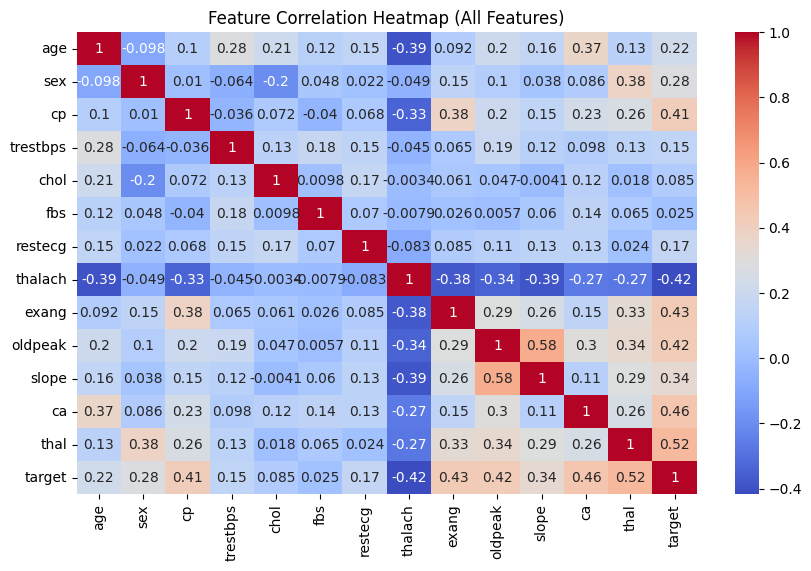

In [ ]:
# Correlation Heatmap (Before Feature Selection)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (All Features)")
plt.show()

In [ ]:
X = df_reduced.drop('target', axis=1)
y = df_reduced['target']


In [ ]:

# Step 5: Drop Low-Importance Features
drop_features = ['fbs', 'restecg', 'slope']
df_reduced = df.drop(columns=drop_features)
print("\n🚫 Dropped low-importance columns:", drop_features)
print("Remaining Features:", df_reduced.columns.tolist())




🚫 Dropped low-importance columns: ['fbs', 'restecg', 'slope']
Remaining Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']


In [ ]:
import joblib

heart_features = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'thalach', 'exang', 'oldpeak', 'ca', 'thal'
]

joblib.dump(heart_features, "heart_features.pkl")
print("✅ heart_features.pkl saved successfully!")

✅ heart_features.pkl saved successfully!


In [ ]:
from google.colab import files
files.download("heart_features.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n🔹 Training Samples:", X_train.shape[0])
print("🔹 Testing Samples:", X_test.shape[0])


🔹 Training Samples: 242
🔹 Testing Samples: 61


In [ ]:
# Most correlated features with target
target_corr = corr['Diabetes_012'].abs().sort_values(ascending=False)[1:11]
print("\nTop 10 Correlated Features with Diabetes_012:")
print(target_corr)


Top 10 Correlated Features with Diabetes_012:
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Income                  0.171483
Education               0.130517
Name: Diabetes_012, dtype: float64


In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Model Training (Random Forest)
model = RandomForestClassifier(
    n_estimators=250,
    max_depth=8,
    random_state=42,
    criterion='gini'
)

In [ ]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, n_estimators=250, random_state=42)

In [ ]:
#Model Evaluation
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [ ]:
print("\n✅ Model Performance:")
print(f"Accuracy: {acc*100:.2f}%")
print(f"ROC-AUC Score: {roc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Performance:
Accuracy: 90.16%
ROC-AUC Score: 0.906

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



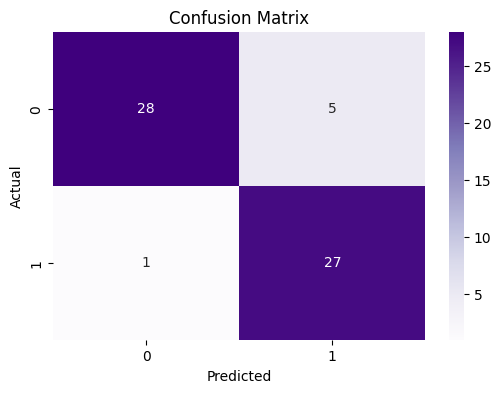

In [ ]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

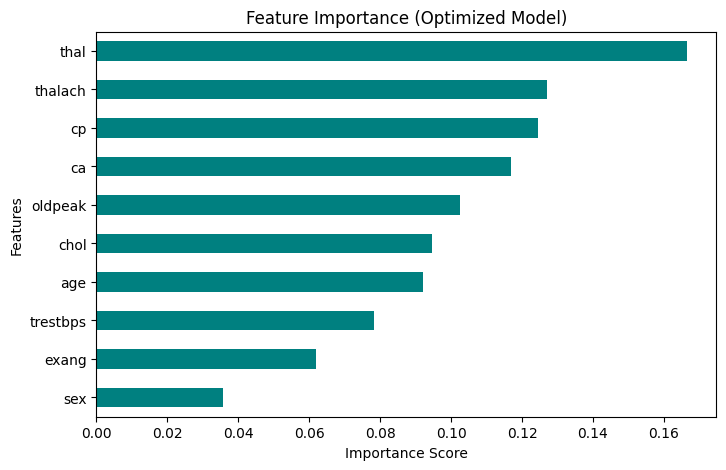

In [ ]:
#Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=True)
plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importance (Optimized Model)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

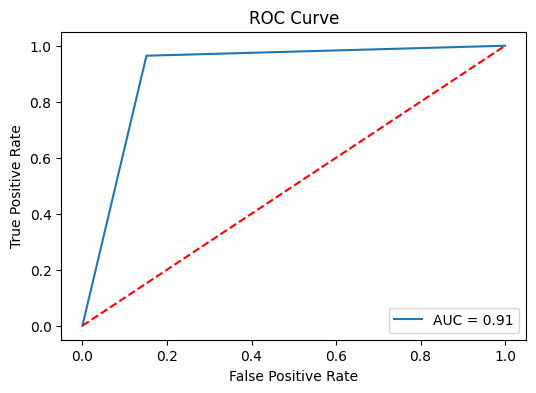

In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
#Cross Validation
cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\n📘 Cross-validation Mean Accuracy: {cv_score.mean()*100:.2f}%")


📘 Cross-validation Mean Accuracy: 80.14%


In [ ]:
#Predict for New Patient Example
print("\n--- Example Prediction ---")
sample = np.array([[63, 1, 3, 145, 233, 150, 0, 2.3, 0, 3]])
#Feature Order: [age, sex, cp, trestbps, chol, thalach, exang, oldpeak, ca, thal]

sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("\n🩺 Prediction:", "Heart Disease Detected" if prediction[0]==1 else "No Heart Disease Detected")


--- Example Prediction ---

🩺 Prediction: No Heart Disease Detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/heart_rf.pkl")
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [ ]:
from google.colab import files
files.download("models/heart_rf.pkl")
files.download("models/scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install lightgbm -q


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(
    n_estimators=500,          # More trees to learn fine patterns
    learning_rate=0.05,        # Moderate learning rate
    num_leaves=31,             # Controls model complexity
    max_depth=-1,              # Let model decide optimal depth
    min_data_in_leaf=5,        # Allow small leaves for small dataset
    min_gain_to_split=0.0,     # Allow more splits
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=0.1,            # L2 regularization
    random_state=42,
    verbose=-1
)

In [ ]:
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
roc_lgbm = roc_auc_score(y_test, y_pred_lgbm)

print("\n⚡ LightGBM Model (Tuned) Results:")
print(f"Accuracy: {acc_lgbm*100:.2f}%")
print(f"ROC-AUC Score: {roc_lgbm:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))


⚡ LightGBM Model (Tuned) Results:
Accuracy: 85.25%
ROC-AUC Score: 0.858

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

